<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Sarima_arima_of_pressure_5day_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
df=pd.read_csv('pressure.csv')
df.head()

,created_at,pressure
0,2022-02-05 07:03:27 UTC,545.12
1,2022-02-05 07:03:49 UTC,545.93
2,2022-02-05 07:04:10 UTC,546.41
3,2022-02-05 07:04:31 UTC,547.10
4,2022-02-05 07:04:52 UTC,548.49


In [252]:
df.tail()

,created_at,pressure
118,2022-02-08 06:31:51 UTC,515.38
119,2022-02-08 06:32:18 UTC,510.60
120,2022-02-08 06:32:46 UTC,557.06
121,2022-02-08 06:33:13 UTC,551.75
122,2022-02-20 08:55:58 UTC,551.24


In [253]:
df.colunms=["created_at	","pressure"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_at,pressure
0,2022-02-05 07:03:27 UTC,545.12
1,2022-02-05 07:03:49 UTC,545.93
2,2022-02-05 07:04:10 UTC,546.41
3,2022-02-05 07:04:31 UTC,547.10
4,2022-02-05 07:04:52 UTC,548.49


In [254]:
df.tail()

,created_at,pressure
118,2022-02-08 06:31:51 UTC,515.38
119,2022-02-08 06:32:18 UTC,510.60
120,2022-02-08 06:32:46 UTC,557.06
121,2022-02-08 06:33:13 UTC,551.75
122,2022-02-20 08:55:58 UTC,551.24


In [255]:
df['created_at']=pd.to_datetime(df["created_at"])

In [256]:
df.head()

,created_at,pressure
0,2022-02-05 07:03:27+00:00,545.12
1,2022-02-05 07:03:49+00:00,545.93
2,2022-02-05 07:04:10+00:00,546.41
3,2022-02-05 07:04:31+00:00,547.10
4,2022-02-05 07:04:52+00:00,548.49


In [257]:
df.set_index("created_at",inplace=True)

In [258]:
df.head()

,pressure
created_at,
2022-02-05 07:03:27+00:00,545.12
2022-02-05 07:03:49+00:00,545.93
2022-02-05 07:04:10+00:00,546.41
2022-02-05 07:04:31+00:00,547.10
2022-02-05 07:04:52+00:00,548.49


In [259]:
df.shape

(123, 1)

In [260]:
df.describe()

,pressure
count,123.000000
mean,540.060650
std,15.426878
min,510.600000
25%,531.180000
50%,544.010000
75%,548.335000
max,612.730000


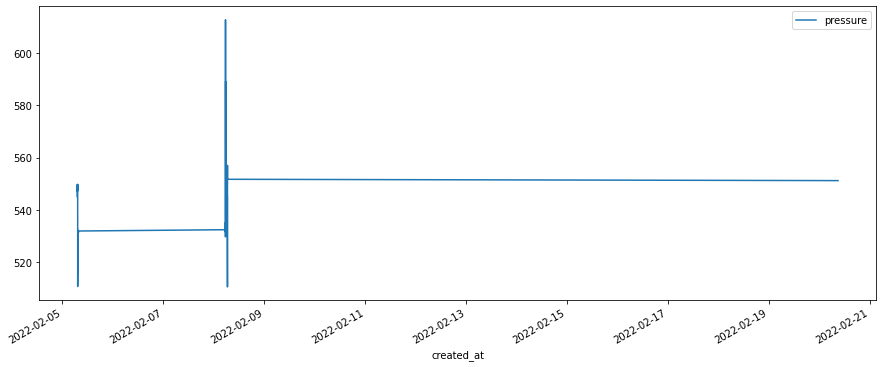

In [261]:
df.plot(figsize=(15,6))
plt.show()

In [262]:
from statsmodels.tsa.stattools import adfuller

In [263]:
test_result=adfuller(df['pressure'])

In [264]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(	pressure):
    result=adfuller(	pressure)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [265]:
adfuller_test(df['pressure'])

ADF Test Statistic : -3.8156085047744597
p-value : 0.0027515964793375157
#Lags Used : 1
Number of Observations Used : 121
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [266]:
df['pr6essureFirst Difference'] = df['pressure'] - df['pressure'].shift(1)

In [267]:
df['pressure'].shift(1)

created_at
2022-02-05 07:03:27+00:00       NaN
2022-02-05 07:03:49+00:00    545.12
2022-02-05 07:04:10+00:00    545.93
2022-02-05 07:04:31+00:00    546.41
2022-02-05 07:04:52+00:00    547.10
                              ...  
2022-02-08 06:31:51+00:00    516.36
2022-02-08 06:32:18+00:00    515.38
2022-02-08 06:32:46+00:00    510.60
2022-02-08 06:33:13+00:00    557.06
2022-02-20 08:55:58+00:00    551.75
Name: pressure, Length: 123, dtype: float64

In [268]:
df['Seasonal First Difference']=df['pressure']-df['pressure'].shift(12)

In [269]:
df.head(14)

,pressure,pr6essureFirst Difference,Seasonal First Difference
created_at,,,
2022-02-05 07:03:27+00:00,545.12,NaN,NaN
2022-02-05 07:03:49+00:00,545.93,0.81,NaN
2022-02-05 07:04:10+00:00,546.41,0.48,NaN
2022-02-05 07:04:31+00:00,547.10,0.69,NaN
2022-02-05 07:04:52+00:00,548.49,1.39,NaN
2022-02-05 07:05:13+00:00,547.91,-0.58,NaN
2022-02-05 07:05:34+00:00,548.79,0.88,NaN
2022-02-05 07:05:56+00:00,548.47,-0.32,NaN
2022-02-05 07:06:32+00:00,548.56,0.09,NaN


In [270]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.56955215821424
p-value : 0.09945490784950428
#Lags Used : 12
Number of Observations Used : 98
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


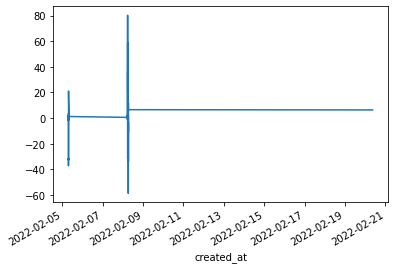

In [271]:
df['Seasonal First Difference'].plot()

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['pressure'])
plt.show()

In [273]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

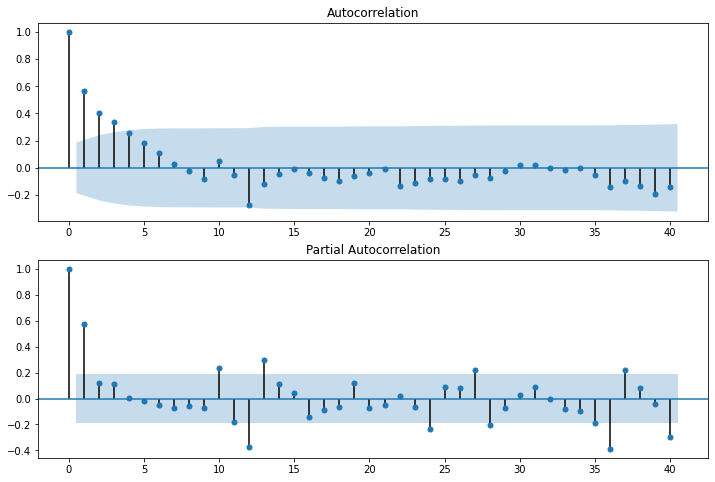

In [274]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [275]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [276]:
model=ARIMA(df['pressure'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [277]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.pressure   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -476.329
Method:                       css-mle   S.D. of innovations             11.843
Date:                Sat, 26 Mar 2022   AIC                            960.659
Time:                        05:32:45   BIC                            971.875
Sample:                             1   HQIC                           965.214
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0588      0.080     -0.735      0.464      -0.216       0.098
ar.L1.D.pressure     0.6398      0.071      8.973      0.000       0.500       0.780
ma.L1.D.pressure    -1.0000      0.041    -24.665      0.000      -1.079      -0.921
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5630           +0.0000j            1.5630            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

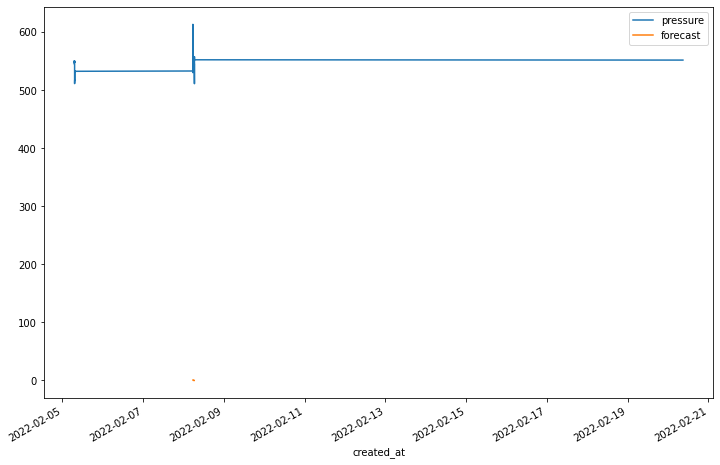

In [278]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['pressure','forecast']].plot(figsize=(12,8))

In [279]:
import statsmodels.api as sm

In [280]:
model=sm.tsa.statespace.SARIMAX(df['pressure'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


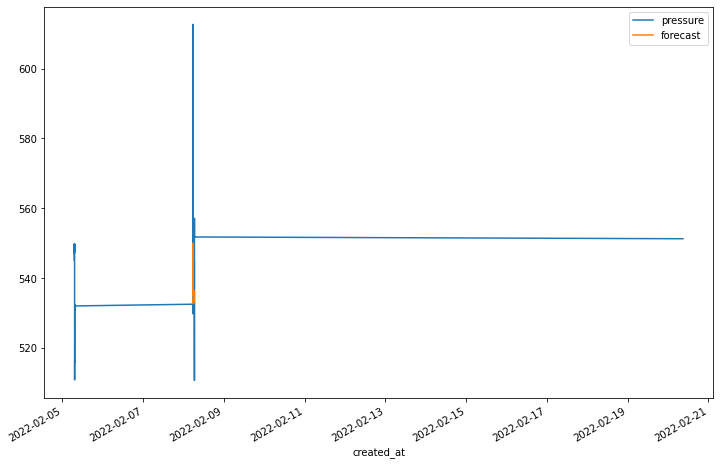

In [281]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['pressure','forecast']].plot(figsize=(12,8))

In [282]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [283]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [284]:
future_datest_df.tail()

,pressure,pr6essureFirst Difference,Seasonal First Difference,forecast
2023-09-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-10-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-11-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2023-12-20 08:55:58+00:00,NaN,NaN,NaN,NaN
2024-01-20 08:55:58+00:00,NaN,NaN,NaN,NaN


In [285]:
future_df=pd.concat([df,future_datest_df])

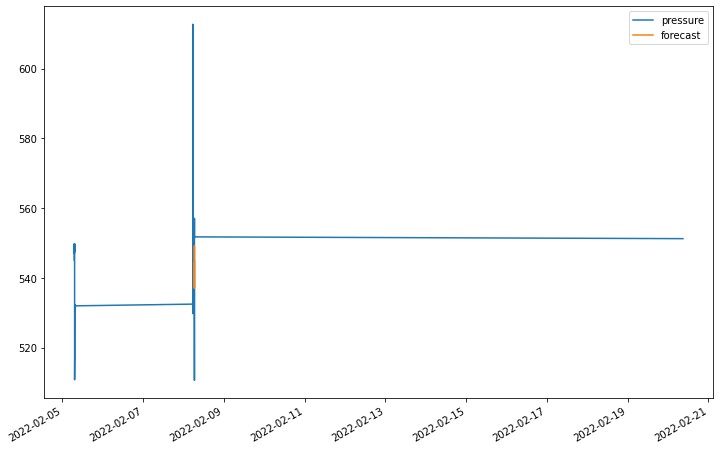

In [286]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['pressure', 'forecast']].plot(figsize=(12, 8)) 